In [1]:
import numpy as np

In [2]:
m = 100  
X = 2 * np.random.rand(m, 1) 
y = 4 + 3 * X + np.random.randn(m, 1)  

# Regressão Linear

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[3.83102395],
       [3.10267168]])

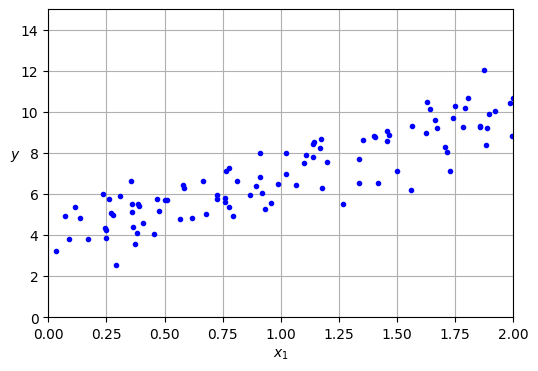

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.83102395],
       [10.03636731]])

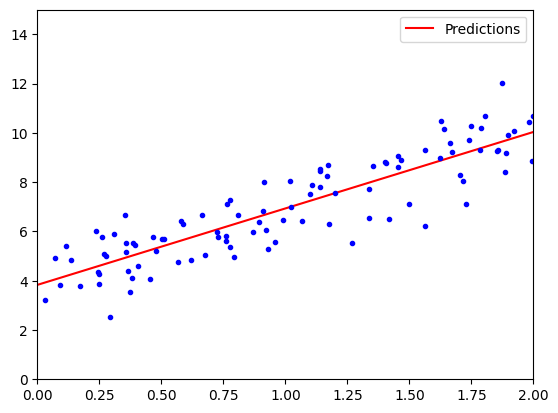

In [8]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.83102395]), array([[3.10267168]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.83102395],
       [10.03636731]])

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # Minimos Quadrados
theta_best_svd

array([[3.83102395],
       [3.10267168]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.83102395],
       [3.10267168]])

# Gradiente Descendente

## Em lote

In [14]:
eta = 0.1   # Taxa de aprendizado
n_interactions = 1000
m = 100

theta = np.random.rand(2,1)

In [15]:
for iteration in range(n_interactions):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[3.83102395],
       [3.10267168]])

## Estocático

In [17]:
n_epochs = 50
t0, t1 = 5, 20  # Hiperparametros

def learning_schedule(t):
    return t0 / (t1 + t)

In [18]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[3.83567411],
       [3.11630053]])

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81800614]), array([3.08892444]))

# Regressão Polinomial

In [23]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

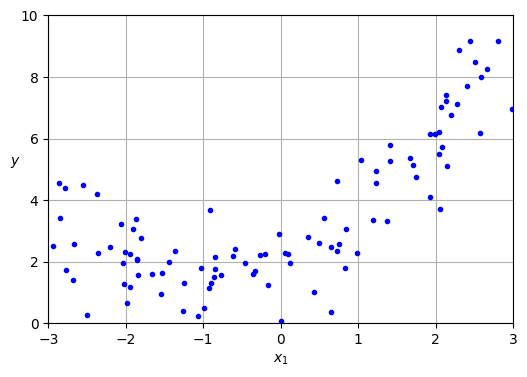

In [24]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.20232661])

In [27]:
X_poly[0]

array([-0.20232661,  0.04093606])

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99164926]), array([[0.98656525, 0.50743685]]))

Função Original: y = 0,5x² + x + 2 + ruido

Função Predita: y = 0,47x² + 92x + 2,12 + ruido

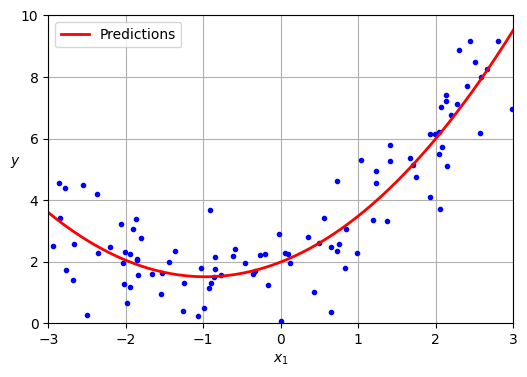

In [30]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Quanto maior o grau, maior a proximidade da equação verdadeira.

# Curva de Aprendizado

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Val')
    plt.legend()


Text(0, 0.5, 'RMSE')

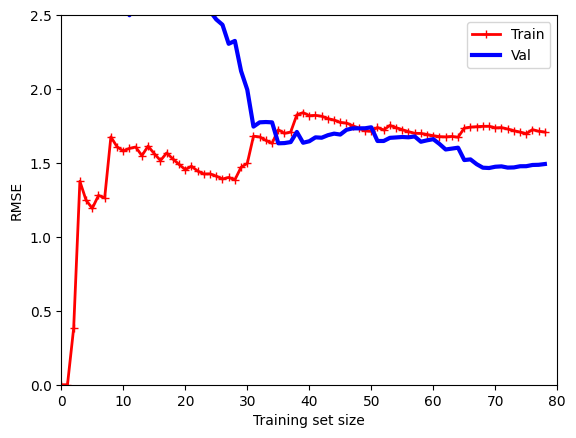

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 2.5])
plt.xlabel('Training set size')
plt.ylabel('RMSE')

In [33]:
from sklearn.pipeline import Pipeline

Curva de aprendizado em um polinomio de 10 graus (mesmos dados)

Text(0, 0.5, 'RMSE')

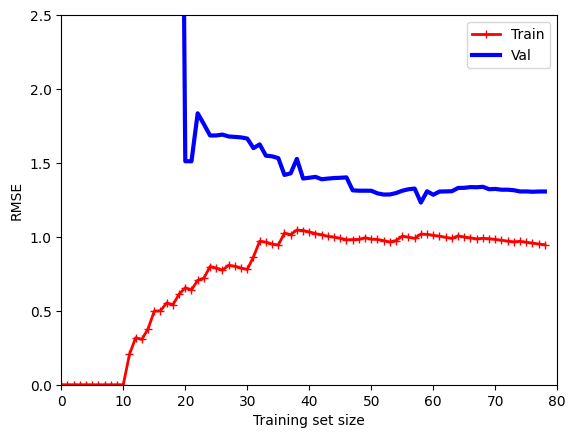

In [34]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 2.5])
plt.xlabel('Training set size')
plt.ylabel('RMSE')

Menor sobreajuste-----------------------------------------------------------Maior precisão

0-------------------------------------------------------------------------------->∞         Grau de Liberdade

Quanto menor o grau do polinimio (Liberdade), menor a chance de o modelo se sobreajustar aos dados (overfitting).

# Modelos Lineares Regularizados

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

## Ridge

Força o modelo a ajustar os dados e mantem o peso do modelo o menor possível

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [38]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

## Lasso

Define o peso de caracteristicas menos importantes como 0. 

A grosso modo, executa automaticamente a seleção de caracteristicas e gera um modelo com poucos pesos diferentes de 0.

In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

Meio termo entre Ridge e Lasso. 

In [40]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

Ratio (R) vai entre 0 e 1, sendo r=0 equivalente à regressão Ridge e r=1 à Lasso.

In [41]:
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])